# TSF - GRIP - Data Science and Business Analytics Internship

# TASK - 5 Exploratory Data Analysis - Sport

### - Shivam Vijay

Problem Statement - Perform EDA on dataset Indian Premier League. As a sports analyst, find out:

1.Most successful teams and players

2.Factors contributing to a team's win or loss

3.Suggest teams or players a company should endorse for its products

### Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [3]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('grade3')

### Loading Datasets

In [41]:
df1=pd.read_csv('C:/Users/shiva/Desktop/GRIP21/Task5/deliveries.csv')
df2=pd.read_csv('C:/Users/shiva/Desktop/GRIP21/Task5/matches.csv')

In [42]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [43]:
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Analysing the data of deliveries dataset

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [45]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [46]:
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [47]:
df1.shape

(179078, 21)

In [48]:

df1.drop(columns=['player_dismissed','fielder'],inplace=True)

### Most runs scored by batsmen in IPL

In [49]:

batsmen_data = df1["batsman"].value_counts()[0:15].sort_values(ascending = False)
batsmen_data

V Kohli           4211
SK Raina          4044
RG Sharma         3816
S Dhawan          3776
G Gambhir         3524
RV Uthappa        3492
DA Warner         3398
MS Dhoni          3318
AM Rahane         3215
CH Gayle          3131
AB de Villiers    2977
KD Karthik        2890
AT Rayudu         2681
SR Watson         2639
PA Patel          2444
Name: batsman, dtype: int64

In [50]:
top7=df1["batsman"].value_counts()[0:7].sort_values(ascending = False)

### Plotting bar plot for top 7 run scorers

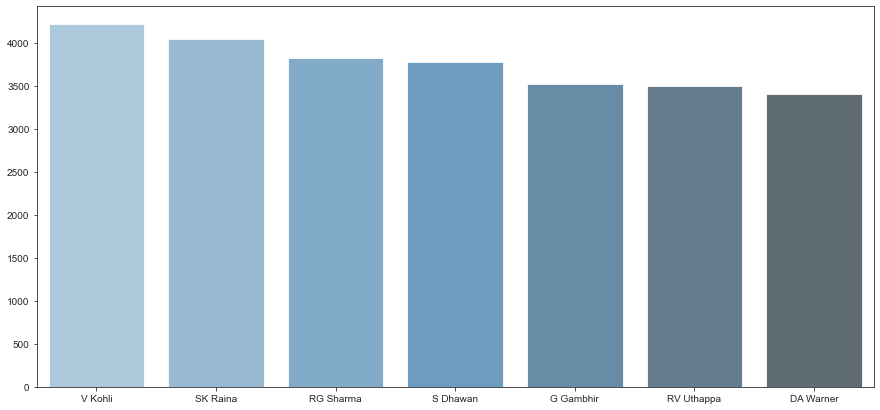

In [51]:
ax = plt.subplots(figsize = (15,7))
x = top7.index
y = top7.values
sns.barplot(x=x , y=y, alpha=0.8, palette = "Blues_d")
plt.show()

### Most Wicket Takers in IPL

In [52]:
bowlers = df1[['bowler','dismissal_kind']]
bowlers = bowlers[(bowlers.dismissal_kind.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped']))]
bowlers = bowlers.groupby('bowler').count().reset_index()
bowlers.rename(columns={'dismissal_kind':'no_wickets'}, inplace=True)
bowlers = bowlers.sort_values(by='no_wickets', ascending=False)
bowlers[0:7]

,bowler,no_wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,149
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125


### Plotting bar graph for top 7 wicket takers

<AxesSubplot:xlabel='bowler', ylabel='no_wickets'>

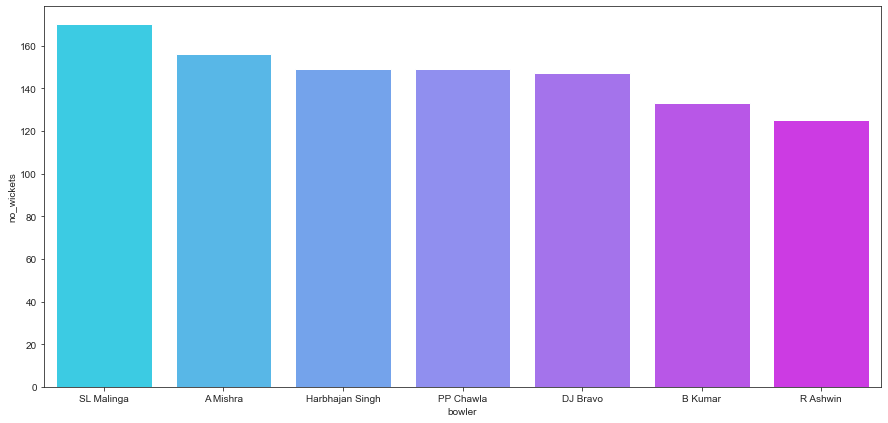

In [53]:
a = plt.subplots(figsize = (15,7))
x = bowlers["bowler"].head(7)
y = bowlers["no_wickets"]
sns.barplot( x=x, y=y, data = bowlers, palette = "cool")

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [55]:
df2.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [56]:
df2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [57]:
df2.dropna(subset=['winner'], how='all', inplace=True)
df2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            634
dtype: int64

In [58]:
df2.shape

(752, 18)

In [59]:
len(df2.season.unique())

12

### Most Frequent Umpires

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'S Ravi'),
  Text(0, 1, 'HDPK Dharmasena'),
  Text(0, 2, 'C Shamshuddin'),
  Text(0, 3, 'AK Chaudhary'),
  Text(0, 4, 'SJA Taufel'),
  Text(0, 5, 'M Erasmus'),
  Text(0, 6, 'Asad Rauf'),
  Text(0, 7, 'Nitin Menon'),
  Text(0, 8, 'BR Doctrove'),
  Text(0, 9, 'RE Koertzen')])

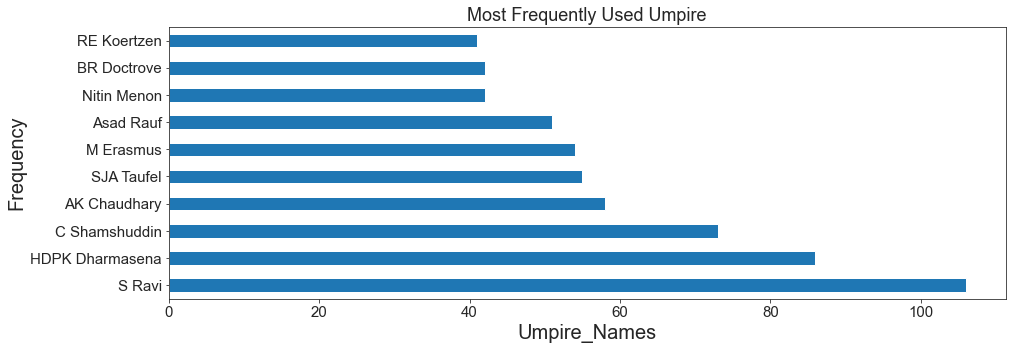

In [60]:
umpires = pd.concat([df2.umpire1,df2.umpire2], ignore_index=True)
umpires = pd.DataFrame(umpires, columns = ['umpire_name'])

umpires['umpire_name'].value_counts().head(10).plot(kind = 'barh', figsize = (15,5))
plt.title("Most Frequently Used Umpire",fontsize=18)
plt.ylabel("Frequency", size = 20)
plt.xlabel("Umpire_Names", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

### Most used Stadium

In [61]:
df2["venue"].value_counts()[0:10]

Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         71
Feroz Shah Kotla                              66
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Subrata Roy Sahara Stadium                    17
Name: venue, dtype: int64

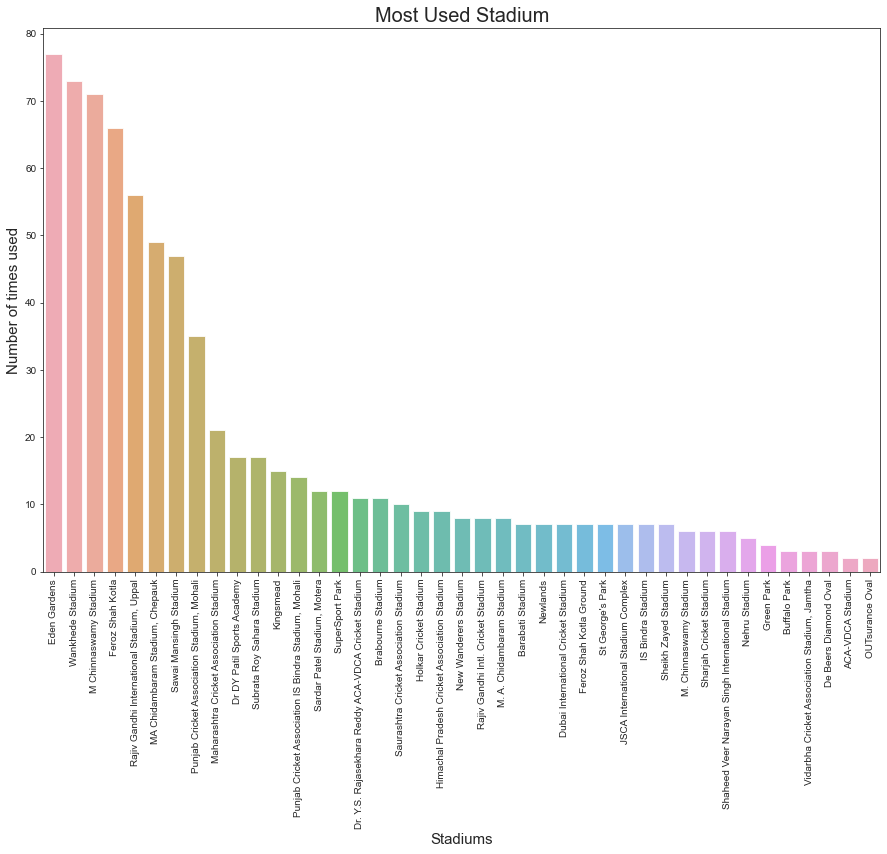

In [62]:
import seaborn as sns
stadium = df2["venue"].value_counts().sort_values(ascending = False)
ax = plt.subplots(figsize = (15,10))
x = stadium.index
y = stadium.values
stad_var = sns.barplot(x=x , y=y, alpha = 0.8)
plt.title("Most Used Stadium", fontsize = 20)
plt.xlabel("Stadiums", fontsize = 15)
plt.ylabel("Number of times used", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

### The most successful team is the team with high winning percentage or a team with most wins

In [63]:
team_df = df2[['team1','team2', 'toss_winner','toss_decision','winner']]
team_df.head()

,team1,team2,toss_winner,toss_decision,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore


In [64]:
teams = df2.team1.unique()
win_percent = []
for each_team in teams:
    team_vs = np.count_nonzero(df2['team1'].astype(str).str.contains(each_team)) + np.count_nonzero(df2['team2'].astype(str).str.contains(each_team))
    team_won = np.count_nonzero(df2['winner'].astype(str).str.contains(each_team))   
    win_percent.append(100 * (team_won / team_vs))

In [65]:
won_df = pd.DataFrame({'Team': teams, 'Win Percantge': win_percent})
won_df

,Team,Win Percantge
0,Sunrisers Hyderabad,53.703704
1,Mumbai Indians,58.288770
2,Gujarat Lions,43.333333
3,Rising Pune Supergiant,50.000000
4,Royal Challengers Bangalore,47.457627
5,Kolkata Knight Riders,51.685393
6,Delhi Daredevils,42.138365
7,Kings XI Punjab,46.590909
8,Chennai Super Kings,60.975610
9,Rajasthan Royals,51.724138


### Plotting the winning percentage visually

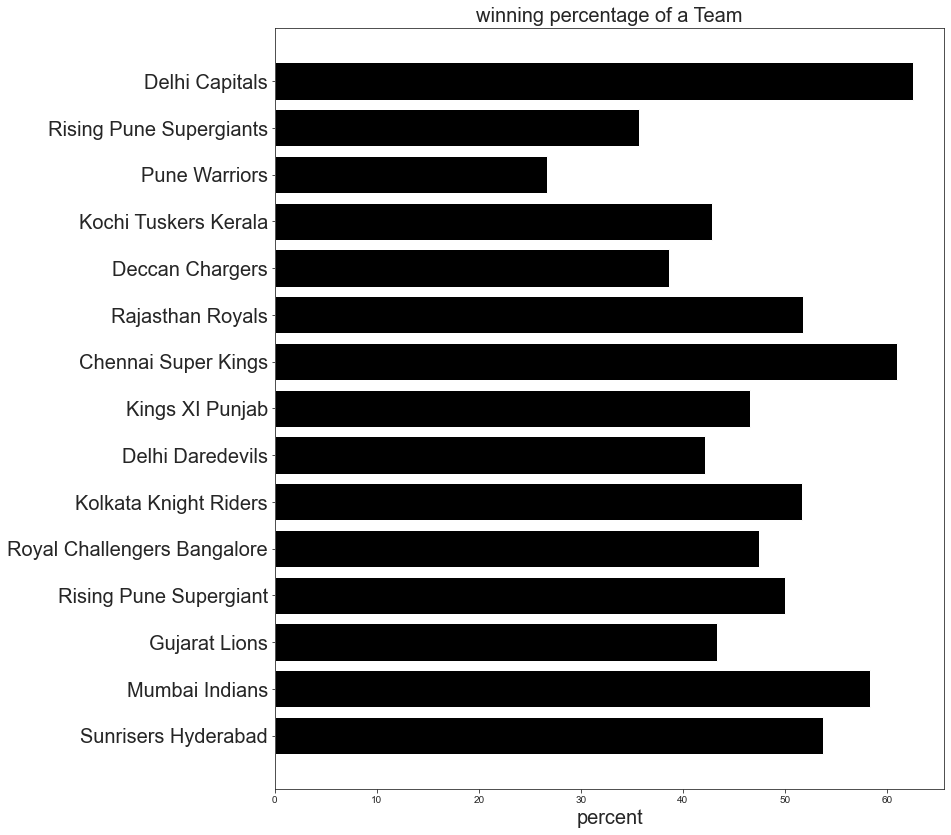

In [66]:
ind = np.arange(won_df.shape[0])
width = 0.8
fig, ax = plt.subplots(figsize=(12,14))
rects = ax.barh(ind, win_percent, color='black', align='center')
ax.set_yticks(ind)
ax.set_yticklabels(won_df.Team.values, rotation='horizontal', fontsize=20)
ax.set_xlabel("percent", fontsize=20)
ax.set_title("winning percentage of a Team", fontsize=20)
plt.show()

In [67]:
df2.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

### Plotting the winner by no. of matches they won

<AxesSubplot:xlabel='winner', ylabel='count'>

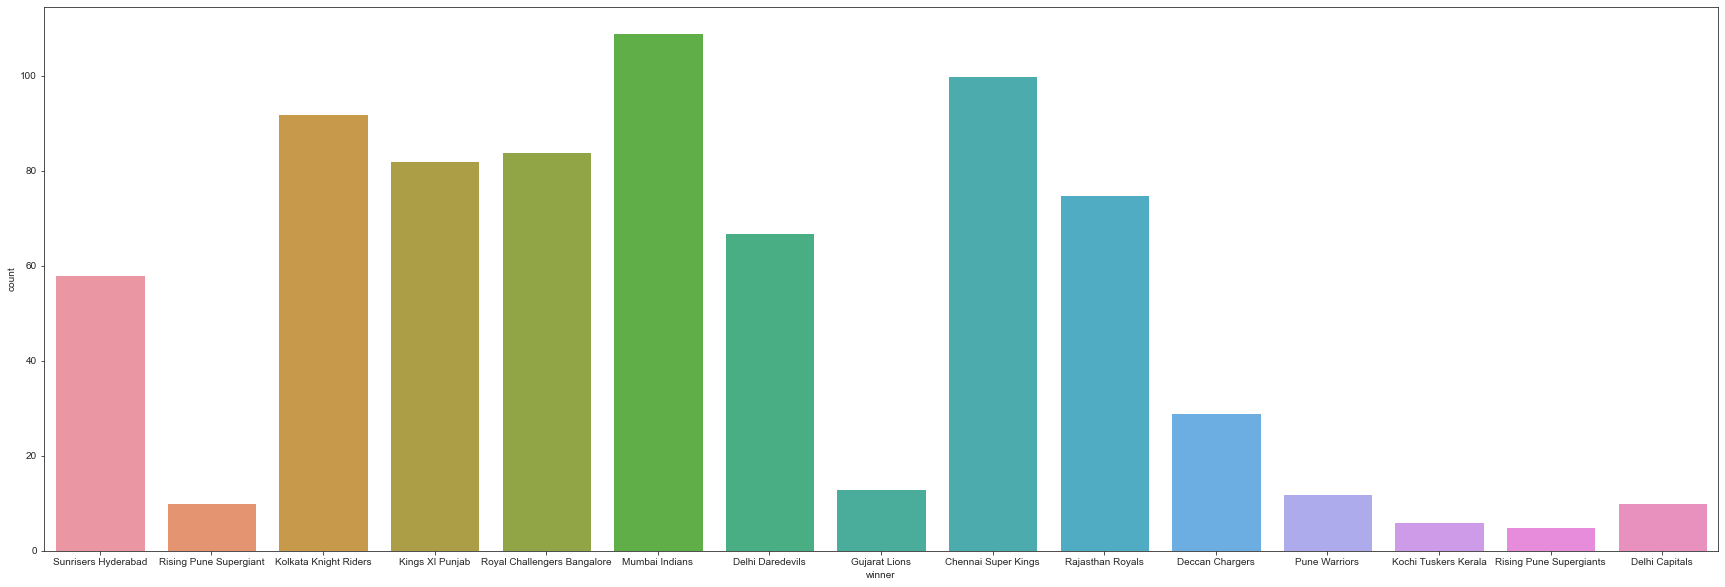

In [68]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x="winner", data=team_df)

According to the win % delhi capitals has the highest % but as per this dataset, it played very less matches.
According to the no. of matches won, mumbai is the highest. But there is a very small difference between CSK and MI as the CSK's winning % is higher than MI's winning %.
So these both teams can be considered as the most successful teams according to this dataset.

### Role of Toss in winning the matches

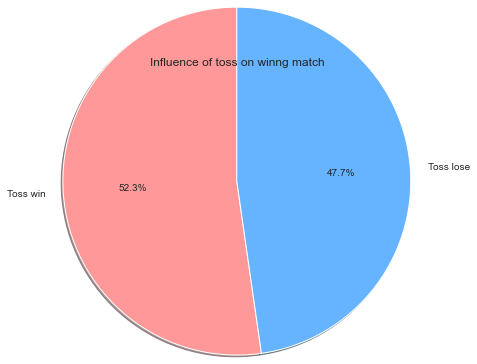

In [69]:
df_toss = df2[['toss_winner', 'winner']]
toss_win = df_toss[df_toss.toss_winner == df_toss.winner].count()[0]
toss_lose = df_toss[df_toss.toss_winner != df_toss.winner].count()[0]
y = [toss_win, toss_lose]
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(y, labels = ["Toss win", "Toss lose"], autopct = '%1.1f%%', radius=2, colors=colors, shadow = True, startangle=90)
plt.title("Influence of toss on winng match")
plt.show()

### Most Consistent Batsmen

In [70]:
mixed = pd.merge(df1,df2, left_on='match_id', right_on ='id')

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

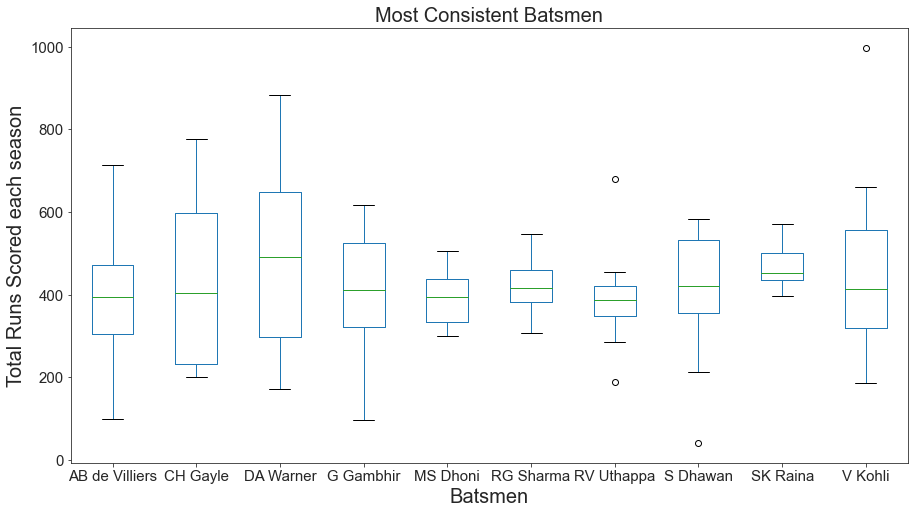

In [71]:
consistency = mixed[mixed.batsman.isin([ 'V Kohli','SK Raina','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]

consistency.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent Batsmen", fontsize = 20)
plt.xlabel("Batsmen", size = 20)
plt.ylabel("Total Runs Scored each season", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

### Batsmen with Highest Average

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

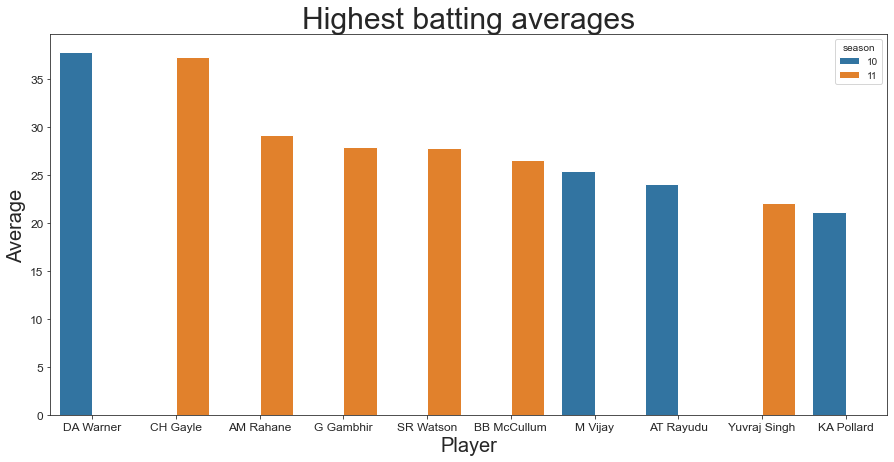

In [72]:
total_matches = pd.DataFrame(mixed.groupby('batsman')['match_id'].nunique()) #total number of matches played by each batsman
runs = pd.DataFrame(mixed.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(mixed.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_data = pd.DataFrame({'match':total_matches['match_id'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_data.reset_index(inplace = True)

batsman_data['batting_average'] = batsman_data['run']/batsman_data['match']
high_avg = batsman_data[batsman_data['season'].isin([10,11])][['season','batsman','batting_average']].sort_values(by = 'batting_average',ascending = False).head(10)
plt.figure(figsize = (15,7))
sns.barplot(x='batsman', y='batting_average', data = high_avg, hue = 'season')
plt.title("Highest batting averages",fontsize= 30)
plt.xlabel("Player", size = 20)
plt.ylabel("Average", size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)

### Most Economical bowlers

In [73]:
runs_given = pd.DataFrame(mixed.groupby('bowler')['batsman_runs'].sum())
balls_bowled = pd.DataFrame(mixed.groupby('bowler')['ball'].count())
overs_bowled = balls_bowled['ball']/6
wickets_taken = pd.DataFrame(mixed[mixed['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(mixed.groupby('bowler')['season'].nunique())
bowler_economy_rate = pd.DataFrame({'runs':runs_given['batsman_runs'],'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season'],'overs':overs_bowled})
bowler_economy_rate.reset_index(inplace = True)
bowler_economy_rate['economy_rate'] = bowler_economy_rate['runs']/bowler_economy_rate['overs']
x=best_economy_rate = bowler_economy_rate[bowler_economy_rate.season >= 5].sort_values(by = 'economy_rate', ascending = True)
best_economy_rate.head(10).style.apply(lambda x: ['background: lightgreen' if x.name in [106,315,253]else '' for i in x], axis=1)
x.head(10)

,bowler,runs,balls,wickets,season,overs,economy_rate
108,DW Steyn,2283,2207,104,10,367.833333,6.206615
207,M Muralitharan,1642,1581,67,7,263.500000,6.231499
291,RN ten Doeschate,88,83,3,5,13.833333,6.361446
286,RE van der Merwe,486,455,25,5,75.833333,6.408791
269,R Ashwin,3224,3016,138,10,502.666667,6.413793
340,SL Malinga,3218,2974,188,9,495.666667,6.492266
347,SP Narine,2825,2600,137,8,433.333333,6.519231
138,J Botha,781,709,27,5,118.166667,6.609309
101,DL Vettori,870,785,34,5,130.833333,6.649682
126,Harbhajan Singh,3880,3451,161,12,575.166667,6.745871


In [78]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Text(0.5, 1.0, 'Most Economical Bowlers')

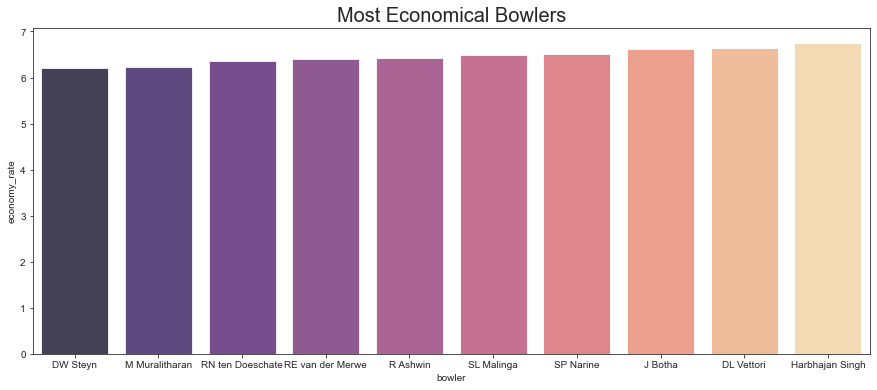

In [79]:
ax = plt.subplots(figsize = (15, 6))
sns.barplot(x["bowler"].head(10),x["economy_rate"] , alpha = 0.8, palette = "magma")
plt.title("Most Economical Bowlers", size = 20)

### Finding the players with most no. of MOM's(Man Of the Match)

In [75]:
mom_df = df2[['team1','team2','toss_winner','toss_decision','winner','win_by_runs','win_by_wickets','player_of_match']]
mom_df.head()

,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7,SPD Smith
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav


In [76]:
top_bat = df2['player_of_match'].value_counts().reset_index()
top_bat.columns = ['player_name', 'times_player_of_the_match']
top_bat = top_bat.loc[top_bat['times_player_of_the_match']>8]
top_bat = top_bat.sort_values(by='times_player_of_the_match')
top_bat

,player_name,times_player_of_the_match
20,AT Rayudu,9
18,SE Marsh,9
19,SP Narine,9
17,JH Kallis,10
16,KA Pollard,10
15,V Sehwag,11
14,A Mishra,11
13,AD Russell,11
12,DR Smith,11
11,AM Rahane,12


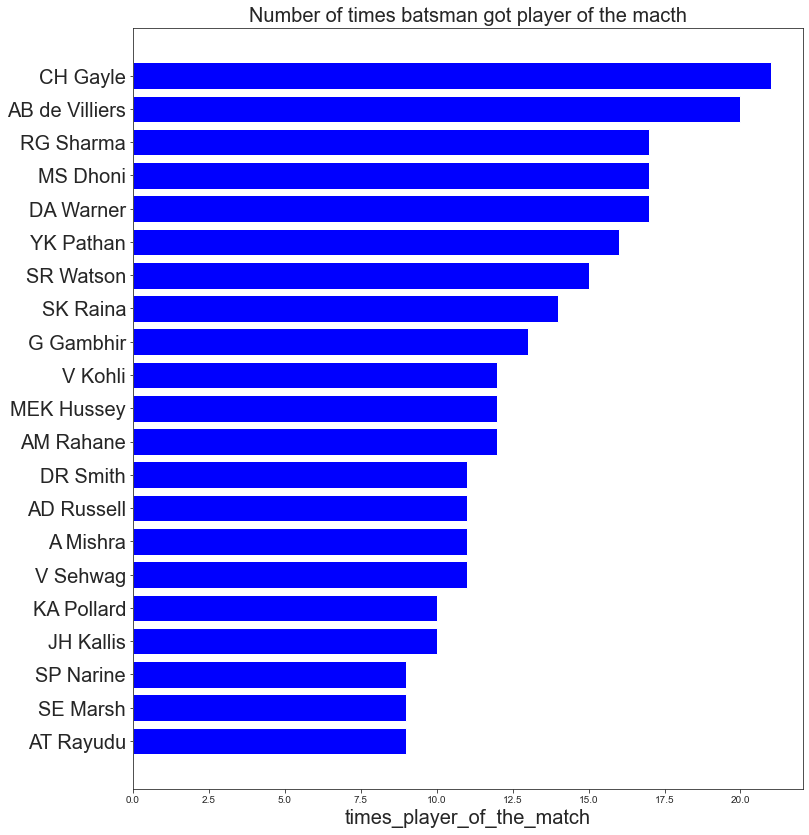

In [77]:
ind = np.arange(top_bat.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,14))
rects = ax.barh(ind, top_bat.times_player_of_the_match.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(top_bat.player_name.values, rotation='horizontal', fontsize=20)
ax.set_xlabel("times_player_of_the_match", fontsize=20)
ax.set_title("Number of times batsman got player of the macth", fontsize=20)
plt.show()

### According to MOM awards,most runs,consistency,economy and most wickets, the top 7 most successful players are:

1. CH Gayle
2. AB Develliers
3. MS Dhoni
4. RG Sharma
5. DA Warner
6. V Kohli
7. DW Steyn

## Final Conclusions:

Mumbai Indians & Chennai Super Kings are the most successful teams in IPL till now.

Christopher Gayle has been most awarded "Man of the Match"

Virat Kohli has scored most runs in IPL

L Malinga has taken most wickets

Suresh Raina has been Most Consistent Batsman.

DA Warner has the most highest Average

Dale Steyn has the best economy in IPL

S Ravi is the most used umpire

Eden Garden is the most used stadium

In list of most runs scorers, only MS Dhoni & AB De Villers are not opening batsman.

CSK is the only team, who opts to bat first mostly